In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# unterdrücke die Anzeige exponantieller Schreibweise
np.set_printoptions(suppress=True)

In [18]:
df = pd.read_csv("data/Batting.csv")

In [19]:
df.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP'],
      dtype='object')

In [20]:
batting_year_2021 = df[df.yearID == 2021][["G", "AB", "H", "2B", "3B", "HR"]]

In [22]:
batting_year_2021.head()

,G,AB,H,2B,3B,HR
108789,16,0,0,0,0,0
108790,8,3,1,0,0,0
108791,28,0,0,0,0,0
108792,31,0,0,0,0,0
108793,152,566,148,30,2,30


In [23]:
batting_year_2021_np = np.array(batting_year_2021)

batting_year_2021_np.shape

(1706, 6)

In [28]:
np.savetxt("data/batting_hits_2021.txt", batting_year_2021_np)

In [29]:
batting = np.genfromtxt("data/batting_hits_2021.txt", dtype="int32")

In [30]:
batting.shape

(1706, 6)

In [31]:
# Games, AtBats, Basehit, 2nd, 3rd, HR

# Wie viele Hits gab es im Jahr 2021 insgesamt?
# Wir summieren also über die Spalten mit Index 2 bis Ende

np.sum(batting[:, 2:])

53962

In [32]:
# dies ist der äquivalente Aufruf der Methode .sum()

batting[:, 2:].sum() # jemand mit einem "funktionalen" Mindset würde aber obigen Stil präferieren

53962

In [33]:
# Wie viele Hits hatte ein Spieler in der Saison 2021 durchschnittlich?

np.mean(batting[:, 2:])

7.90767878077374

In [34]:
# Das scheinen sehr wenige Hits für eine ganze Saison zu sein.
# Was sagt uns die Standardabweichung?

np.std(batting[:, 2:])

23.314267645684566

In [35]:
# Besser ist wohl, wir sehen uns erst einmal den stabileren Median an

np.median(batting[:, 2:])

0.0

In [37]:
# Ohje! Ein deutliches Zeichen, dass wir die Personen aussortieren sollten, die gar keine Hits geschlagen haben.

batting_cleaned = batting[np.apply_along_axis(lambda x: np.any(x), 1, batting[:, 2:])]

print(batting_cleaned[:10, :]) # Anzeige der ersten 10 Einträge

print(batting_cleaned.shape)

[[  8   3   1   0   0   0]
 [152 566 148  30   2  30]
 [ 82 297  84  19   1  24]
 [ 41 132  26   6   1   5]
 [ 99 365 104  26   0  20]
 [ 22  36   6   1   0   0]
 [ 12  28   3   2   0   0]
 [ 35  71  19   6   1   2]
 [ 35 130  32   5   2   4]
 [109 182  45   9   2   5]]
(857, 6)


In [38]:
# Das sieht schon besser aus!
# Schauen wir uns also noch einmal sum, mean, median und standard deviation an
print(np.mean(batting_cleaned[:, 2:]))

print(np.median(batting_cleaned[:, 2:]))

print(np.std(batting_cleaned[:, 2:]))

15.741540256709452
3.0
30.963189104826743


(857,)


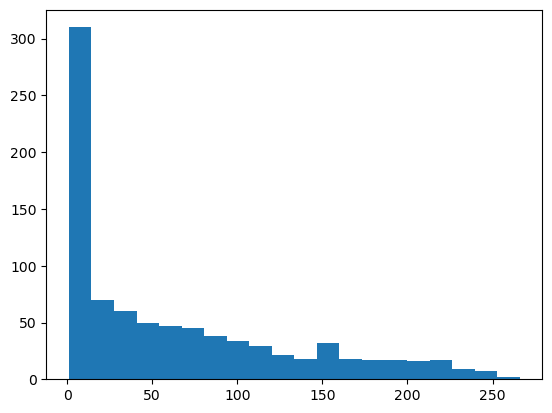

In [39]:
# schauen wir uns doch mal in einem Histogramm an, wie sich die Summen verteilen

sum_hits = np.apply_along_axis(lambda x: np.sum(x), 1, batting_cleaned[:, 2:])

print(sum_hits.shape)

plt.hist(sum_hits, bins=20)
plt.show()

In [40]:
# wie sieht es noch aus, wenn wir die Spieler herausnehmen, die weniger als 6 Hits hatten

hits, counts = np.unique(sum_hits, return_counts=True)

print(dict(zip(hits, counts)))

{1: 81, 2: 48, 3: 31, 4: 28, 5: 23, 6: 17, 7: 15, 8: 14, 9: 13, 10: 9, 11: 7, 12: 8, 13: 14, 14: 2, 15: 9, 16: 7, 17: 3, 18: 10, 19: 7, 20: 5, 21: 6, 22: 5, 23: 2, 24: 6, 25: 3, 26: 4, 27: 3, 28: 5, 29: 7, 30: 4, 31: 4, 32: 7, 33: 2, 34: 1, 35: 6, 36: 7, 37: 1, 38: 4, 39: 6, 40: 6, 41: 6, 42: 4, 43: 8, 44: 2, 45: 2, 46: 3, 47: 2, 48: 5, 49: 2, 50: 6, 51: 3, 52: 4, 53: 3, 54: 1, 55: 6, 56: 6, 57: 3, 58: 3, 59: 7, 61: 7, 62: 1, 63: 2, 64: 3, 65: 4, 66: 2, 67: 2, 68: 7, 69: 3, 70: 2, 71: 4, 73: 6, 74: 5, 75: 4, 76: 2, 77: 5, 78: 3, 79: 1, 80: 3, 81: 4, 82: 3, 83: 3, 84: 5, 85: 3, 86: 3, 87: 4, 88: 2, 89: 2, 90: 3, 91: 2, 92: 3, 93: 1, 94: 4, 95: 3, 96: 4, 97: 3, 98: 2, 99: 2, 100: 3, 101: 5, 102: 1, 103: 3, 104: 2, 105: 1, 106: 1, 107: 2, 108: 1, 109: 1, 110: 2, 111: 3, 112: 2, 113: 2, 114: 2, 115: 1, 116: 4, 117: 1, 118: 1, 119: 3, 120: 4, 121: 5, 123: 4, 124: 2, 125: 2, 126: 1, 128: 2, 129: 2, 130: 1, 131: 1, 132: 1, 134: 3, 135: 2, 136: 1, 137: 1, 138: 1, 139: 1, 140: 2, 141: 1, 142: 3

(578,)


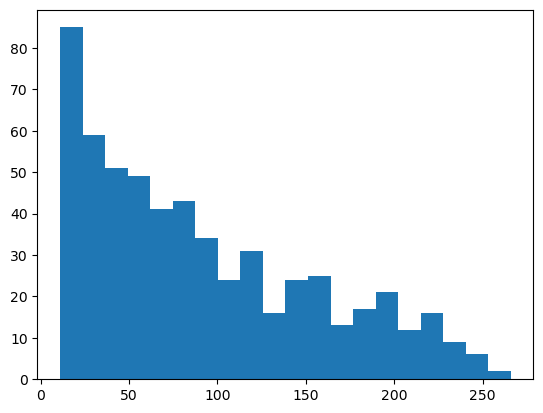

In [41]:
# wie sieht es noch aus, wenn wir die Spieler herausnehmen, die weniger als 11 Hits hatten

sum_hits_over_10 = sum_hits[np.apply_along_axis(lambda x: x > 10, 0, sum_hits)]

print(sum_hits_over_10.shape)

plt.hist(sum_hits_over_10, bins=20)
plt.show()

In [48]:
# aber vielleicht resultieren die wenigen Hits pro Saison auch einfach an der Tatsache, dass viele Spieler,
# die gelistet wurden, gar nicht die ganze Saison spielten.
# In welcher Korrelation steht eigentlich die Anzahl Spiele, bzw. Anzahl At-Bats im Verhältnis
# zu den geschlagenen Hits?

# wir holen uns die Spalten Games und At-Bats...
games_atbats = batting_cleaned[:, :2]

# ... richten den Shape von sum_hits ...
sum_hits.shape = (857, 1)

# ... und fügen beide an der 1. Achse zusammen.
g_ab_hits = np.concatenate((games_atbats, sum_hits), axis=1)

g_ab_hits

array([[  8,   3,   1],
       [152, 566, 210],
       [ 82, 297, 128],
       ...,
       [ 99, 299,  86],
       [110, 255,  92],
       [109, 333, 118]])

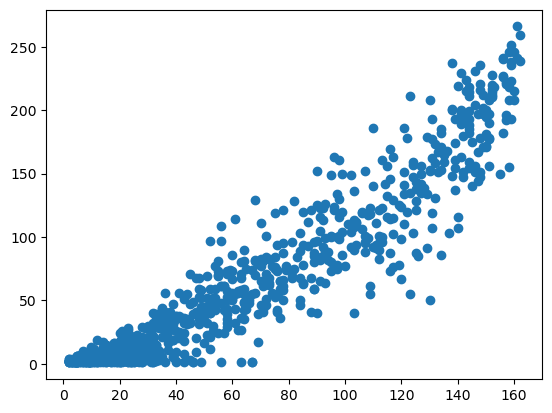

In [51]:
# Wie ist die Korrelation zwischen Games und Hits?

plt.scatter(g_ab_hits[:, 0], g_ab_hits[:, 2])
plt.show()

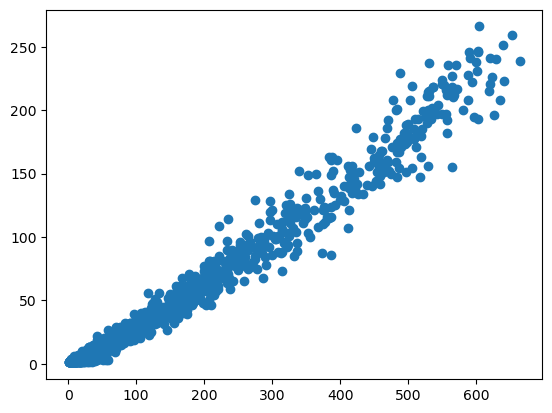

In [52]:
# Das sieht schon mal sehr eindeutig aus!
# Und wie ist dann die Korrelation zwischen At-Bats und Hits?

plt.scatter(g_ab_hits[:, 1], g_ab_hits[:, 2])
plt.show()

In [53]:
# Was ist eigentlich mean und median von Game und At-Bats pro Spieler?

print(f"Mean Games: {np.mean(g_ab_hits[:, 0])}")
print(f"Median Games: {np.median(g_ab_hits[:, 0])}\n")

print(f"Mean At-Bats: {np.mean(g_ab_hits[:, 1])}")
print(f"Median At-Bats: {np.median(g_ab_hits[:, 1])}")

Mean Games: 62.4924154025671
Median Games: 49.0

Mean At-Bats: 187.7561260210035
Median At-Bats: 127.0


In [66]:
# "Echte" Ausnahmespieler scheinen also zu den oberen 50% der Spieler in der MLB zu gehören.
# Wir brauchen also einen weiteren statistischen Wert, der besser als die reinen Anzahl an Hits ausdrückt,
# wie gut ein Spieler den Ball trifft. Dieser Wert ist traditionellerweise der sog. Batting Average oder
# einfach AVG. Also die Anzahl an Hits geteilt durch die Anzahl an At-Bats.
# Fügen wir diesen Wert als neue Spalte hinzu:

avg = np.apply_along_axis(lambda x: x[2] / x[1], 1, g_ab_hits)

avg.shape = (avg.shape[0], 1)

g_ab_hits_avg = np.concatenate((g_ab_hits, avg), axis=1, dtype="float32")

print(g_ab_hits_avg)

[[  8.           3.           1.           0.33333334]
 [152.         566.         210.           0.37102473]
 [ 82.         297.         128.           0.43097642]
 ...
 [ 99.         299.          86.           0.28762543]
 [110.         255.          92.           0.36078432]
 [109.         333.         118.           0.35435435]]


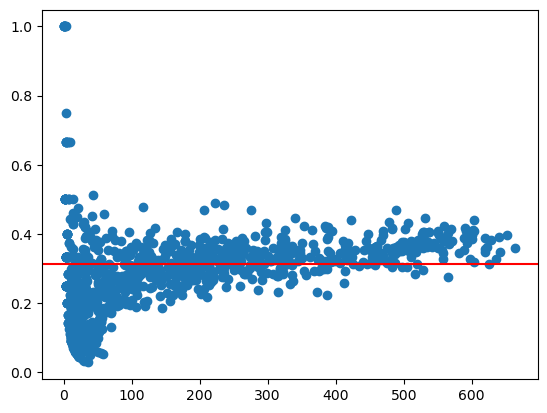

In [75]:
# wie sieht nun die Korrelation zwischen At-Bats und AVG aus?

plt.scatter(g_ab_hits_avg[:, 1], g_ab_hits_avg[:, 3])
plt.axhline(np.median(g_ab_hits_avg[:, 3]), color='r')
plt.show()

In [70]:
# Was ist der durchschnittliche AVG bei Spielern, die mehr als hundert At-Bats haben?

over_100_abs = g_ab_hits_avg[g_ab_hits_avg[:, 1] > 100]

np.mean(over_100_abs[:, 3])

0.3330699

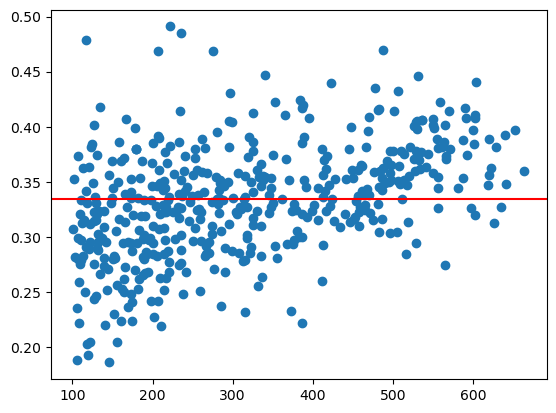

In [76]:
# das wollen wir nun noch plotten

plt.scatter(over_100_abs[:, 1], over_100_abs[:, 3])
plt.axhline(np.median(over_100_abs[:, 3]), color='r')
plt.show()